# Decision Tree Visualization

In [821]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [822]:
# Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

In [823]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [824]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(
    dt_clf
    , out_file='tree.dot'
    , class_names=iris_data.target_names
    , feature_names=iris_data.feature_names
    , impurity=True
    , filled=True
)

# class_names : 타겟값들의 컬럼명들
# feature_names : 피쳐들의 컬럼명들
# impurity : 지니값(새로운 트리로 분기하기위한 기준의 값)의 표시여부
# filled : 각 노드의 색을 다르게

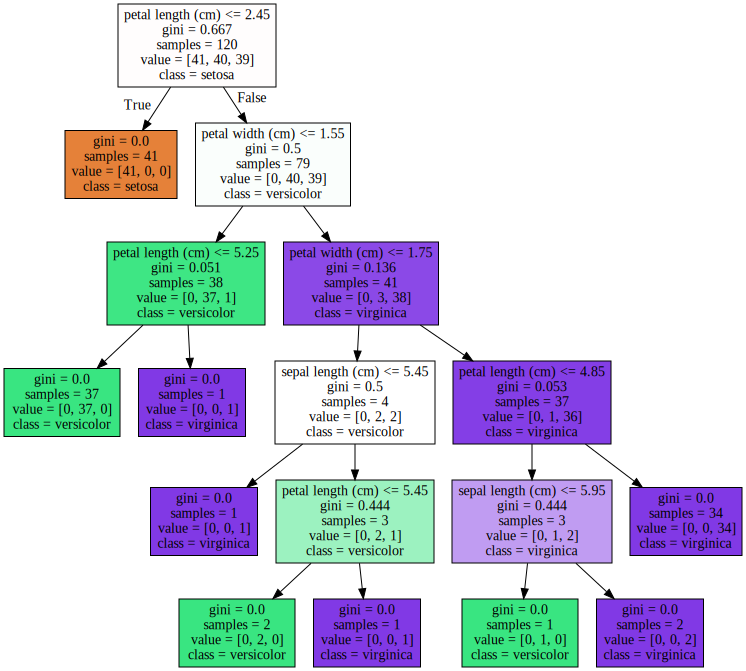

In [825]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter notebook상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [826]:
import seaborn as sns
import numpy as np

sns.set_style("white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

# feature importance : 각 컬럼별 중요도(결정 기여도)
print('Feature importances: \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
# petal : 꽃잎 sepal : 꽃 받침

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

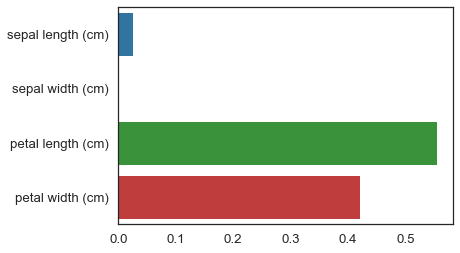

In [827]:
# feature 별 importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [828]:
from sklearn.model_selection import cross_val_score
iris_data = load_iris()
dt_clf = DecisionTreeClassifier()
data = iris_data.data
label = iris_data.target
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 0.98]
평균 검증 정확도:  0.96


### GridSearchCV

- 튜닝의 대상이 되는 구조상 요소들의 값을 바꿔가면서 성능을 평가한 후 가장 좋았던 때의 파라미터들로 학습한 모델을 선택합니다.
- gridSearchCV에 적용할 구성 요소들의 값들을 하이퍼 파라미터라고 부르며, 구성요소 및 적용할 값은 각각 2개 이상일 수 있습니다.
- 제시된 하이퍼 파라미터들의 모든 조합으로 모두 fit 하고 테스트합니다.

In [829]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [830]:
iris = load_iris()
X_tain, X_test, y_train, y_test =  train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# GridSearchCV에 들어갈 파라미터 설정
paraeters = {'max_depth' :[1, 2, 3], 'min_samples_split':[2, 3]}
# dictionary형태의 전달 파라미터
# amx_depth 트리의 가지라 아래로 몇칸 뻗어 나갈지의 경계값 : Default 값 - None
# min_samples_split 현재 노드에서 가지가 분리되어 나가기위한 보유 최소 데이터수

# 파라미터 조합 - 실행단위 별 입력 파라미터
# 'max_depth': 1, 'min_samples_split': 2
# 'max_depth': 1, 'min_samples_split': 3
# 'max_depth': 2, 'min_samples_split': 2
# 'max_depth': 2, 'min_samples_split': 3
# 'max_depth': 3, 'min_samples_split': 2
# 'max_depth': 3, 'min_samples_split': 3

In [831]:
from sklearn.model_selection import  GridSearchCV,train_test_split
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=paraeters, cv=3, refit=True, return_train_score=True)

# dtree : Estimator (알고리즘)
# param_grid=parameters 위에서 설정한 파라미터값
# cv=3 : 3회 train, 3개의 test set fold로 나누어 테스트 수행 설정.
# refit=True 가 default. True이면 가장 좋은 파라미터 설정으로 재학습 시킴

# 이 모든것이 grid_dtree라는 이름으로 학습하기위한 사전 설정 사항들
grid_dtree.fit(X_train, y_train) # 학습

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [832]:
# GridSearchCV 결과는 cv_results_라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scroes_df = pd.DataFrame(grid_dtree.cv_results_)
scroes_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.366667,1,0.400,0.325,0.375
1,"{'max_depth': 1, 'min_samples_split': 3}",0.366667,1,0.400,0.325,0.375
2,"{'max_depth': 2, 'min_samples_split': 2}",0.358333,5,0.375,0.400,0.300
3,"{'max_depth': 2, 'min_samples_split': 3}",0.358333,5,0.375,0.400,0.300
4,"{'max_depth': 3, 'min_samples_split': 2}",0.358333,3,0.350,0.325,0.400
5,"{'max_depth': 3, 'min_samples_split': 3}",0.358333,3,0.350,0.325,0.400


In [833]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.3667


In [834]:
from sklearn.metrics import accuracy_score

# 앞서 GridSearchCV 객체가 fit()을 수행하여 학습이 완료된 Estimator를
# 내포하고 있으므로 이의 predict()를 통해 예측과 평가 실행
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.3333


In [835]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 꺼내어서 별도 저장
estimator = grid_dtree.best_estimator_
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.3333
